# Traffic Jam Problem

In [161]:
from IPython.display import Image
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)}) #Set our seaborn aesthetics (we're going to customize our figure size)

import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt

# Problem

This challenge asks you to **build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time.** There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.

The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

All of these points are mapped here.

Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.



# Data Cleaning

## Making Useable Data Frame

In [162]:
train = pd.read_csv("train_revised.csv")
train.head()
# The data does not have explicit information on the number of seats sold for each ride

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [163]:
train.shape

(51645, 10)

In [164]:
# Each row is one ticket and ride_id is one individual ride
len(train['ride_id'].unique())

6249

In [165]:
train.query("ride_id == 5777")
# The attributes for each ride_id is the same (except for seat_number and payment_receipt)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
5,5777,18B,Mpesa,B6PBDU30IZ,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
6,5777,14A,Mpesa,MZHGDGS6QZ,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
60,5777,15B,Mpesa,7C7P3D5AJQ,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
62,5777,16B,Mpesa,P013NWHQID,27-11-17,7:10,Homa Bay,Nairobi,Bus,49


In [166]:
train['number_of_seats'] = np.linspace(1,1,51645)
train.head()
# Adding col for each seat sold

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_seats
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1.0
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1.0
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1.0
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,1.0
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,1.0


In [167]:
# Number of tickets sold per ride
nos_data = train.groupby('ride_id').sum()[['number_of_seats']]
nos_data.head()

,number_of_seats
ride_id,
1442,1.0
5437,1.0
5710,1.0
5777,5.0
5778,31.0


In [168]:
# Dropping duplicate ride_id rows (row count is the same as nos_data)
train_drop_dup = train.drop_duplicates(subset='ride_id', keep='first')
train_drop_dup.shape

(6249, 11)

In [169]:
train_proc = pd.merge(train_drop_dup, nos_data, on = 'ride_id')
train_proc = train_proc.drop('seat_number', axis = 1)
train_proc = train_proc.drop('payment_receipt', axis = 1).set_index('ride_id')
train_proc = train_proc.drop('number_of_seats_x', axis = 1)
train_proc.head()

,payment_method,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_seats_y
ride_id,,,,,,,,
1442,Mpesa,17-10-17,7:15,Migori,Nairobi,Bus,49,1.0
5437,Mpesa,19-11-17,7:12,Migori,Nairobi,Bus,49,1.0
5710,Mpesa,26-11-17,7:05,Keroka,Nairobi,Bus,49,1.0
5777,Mpesa,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5.0
5778,Mpesa,27-11-17,7:12,Migori,Nairobi,Bus,49,31.0


In [170]:
train_proc.shape
# The same number of rows

(6249, 8)

## Transforming Data (EDA)

I am only transforming this set for exploratory analysis right now

In [171]:
from datetime import datetime, date

In [172]:
 date_form = pd.to_datetime(train_proc.travel_date, infer_datetime_format=True)

In [173]:
# Spliting up travel date
train_proc['travel_date'] = date_form
train_proc['month'] = train_proc['travel_date'].dt.month
train_proc['year'] = train_proc['travel_date'].dt.year
train_proc['day'] = train_proc['travel_date'].dt.day
train_proc.head()

,payment_method,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_seats_y,month,year,day
ride_id,,,,,,,,,,,
1442,Mpesa,2017-10-17,7:15,Migori,Nairobi,Bus,49,1.0,10,2017,17
5437,Mpesa,2017-11-19,7:12,Migori,Nairobi,Bus,49,1.0,11,2017,19
5710,Mpesa,2017-11-26,7:05,Keroka,Nairobi,Bus,49,1.0,11,2017,26
5777,Mpesa,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,5.0,11,2017,27
5778,Mpesa,2017-11-27,7:12,Migori,Nairobi,Bus,49,31.0,11,2017,27


In [174]:
# Formatting travel_time
train_proc['td_minutes'] = pd.to_datetime(train_proc.travel_time, infer_datetime_format=True).dt.minute
train_proc['td_hours'] = pd.to_datetime(train_proc.travel_time, infer_datetime_format=True).dt.hour
train_proc.head()

,payment_method,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_seats_y,month,year,day,td_minutes,td_hours
ride_id,,,,,,,,,,,,,
1442,Mpesa,2017-10-17,7:15,Migori,Nairobi,Bus,49,1.0,10,2017,17,15,7
5437,Mpesa,2017-11-19,7:12,Migori,Nairobi,Bus,49,1.0,11,2017,19,12,7
5710,Mpesa,2017-11-26,7:05,Keroka,Nairobi,Bus,49,1.0,11,2017,26,5,7
5777,Mpesa,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,5.0,11,2017,27,10,7
5778,Mpesa,2017-11-27,7:12,Migori,Nairobi,Bus,49,31.0,11,2017,27,12,7


In [175]:
train_proc['travel_time'] = train_proc['td_hours'] + (train_proc['td_minutes']/60)
train_proc.head()

,payment_method,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_seats_y,month,year,day,td_minutes,td_hours
ride_id,,,,,,,,,,,,,
1442,Mpesa,2017-10-17,7.250000,Migori,Nairobi,Bus,49,1.0,10,2017,17,15,7
5437,Mpesa,2017-11-19,7.200000,Migori,Nairobi,Bus,49,1.0,11,2017,19,12,7
5710,Mpesa,2017-11-26,7.083333,Keroka,Nairobi,Bus,49,1.0,11,2017,26,5,7
5777,Mpesa,2017-11-27,7.166667,Homa Bay,Nairobi,Bus,49,5.0,11,2017,27,10,7
5778,Mpesa,2017-11-27,7.200000,Migori,Nairobi,Bus,49,31.0,11,2017,27,12,7


In [176]:
# data set for EDA, need further processing for analysis
train_eda = train_proc.drop('td_minutes', axis = 1).drop('td_hours', axis = 1)
train_eda.head()

,payment_method,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_seats_y,month,year,day
ride_id,,,,,,,,,,,
1442,Mpesa,2017-10-17,7.250000,Migori,Nairobi,Bus,49,1.0,10,2017,17
5437,Mpesa,2017-11-19,7.200000,Migori,Nairobi,Bus,49,1.0,11,2017,19
5710,Mpesa,2017-11-26,7.083333,Keroka,Nairobi,Bus,49,1.0,11,2017,26
5777,Mpesa,2017-11-27,7.166667,Homa Bay,Nairobi,Bus,49,5.0,11,2017,27
5778,Mpesa,2017-11-27,7.200000,Migori,Nairobi,Bus,49,31.0,11,2017,27


In [177]:
train_eda.to_csv("train_eda")

# EDA

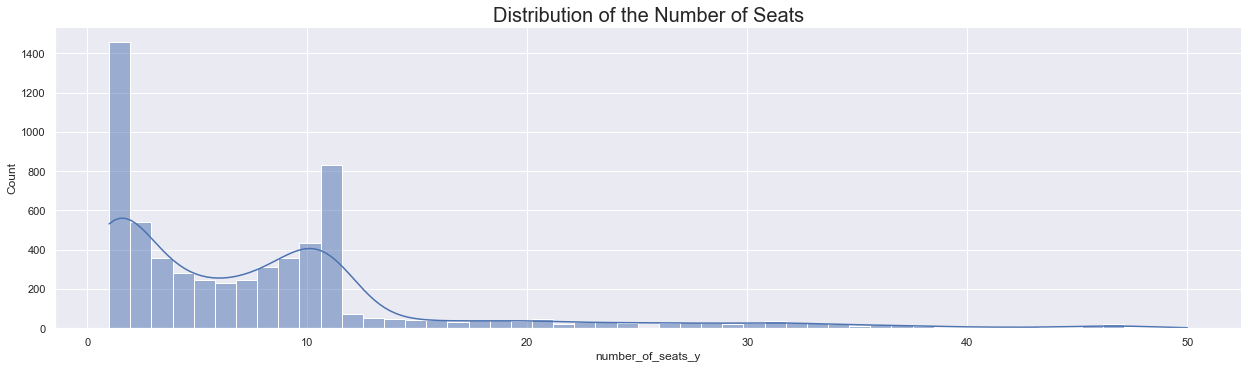

In [199]:
sns.displot(train_eda, x='number_of_seats_y', kde = True, aspect = 3.5)
plt.title("Distribution of the Number of Seats", size = 20);

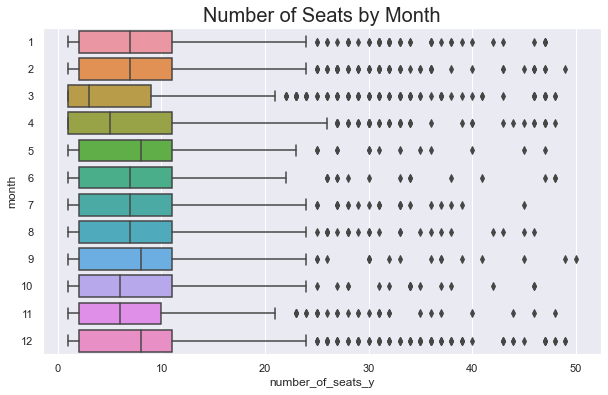

In [200]:
sns.boxplot(data = train_eda, y = 'month', x = 'number_of_seats_y', orient = 'h')
plt.title("Number of Seats by Month", size = 20);
# Would like to reorder how the boxes are shown

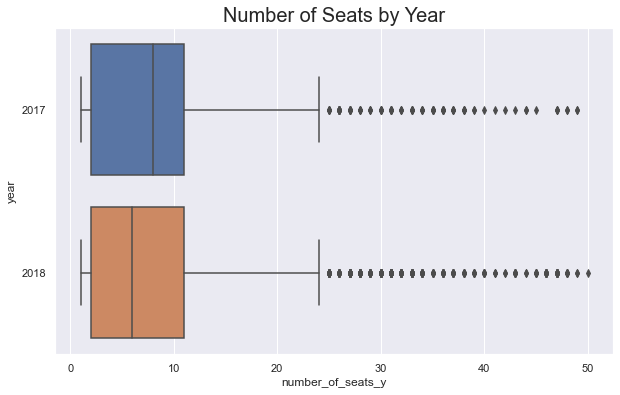

In [201]:
sns.boxplot(data = train_eda, y = 'year', x = 'number_of_seats_y', orient = 'h')
plt.title("Number of Seats by Year", size = 20);

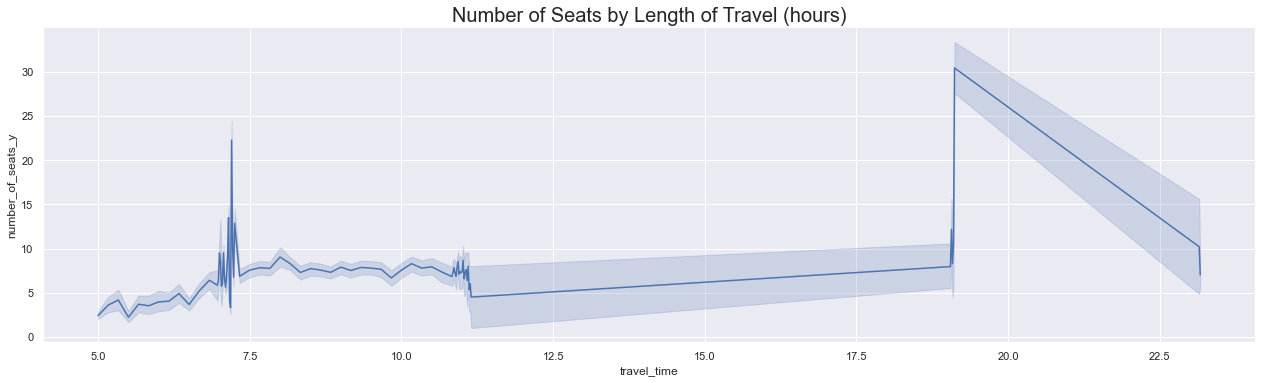

In [202]:
sns.relplot(data = train_eda, y = 'number_of_seats_y', x = 'travel_time', kind = 'line', aspect = 3.5)
plt.title("Number of Seats by Length of Travel (hours)", size = 20);
#Maybe good to make time into categorical ranges and do a boxplot 

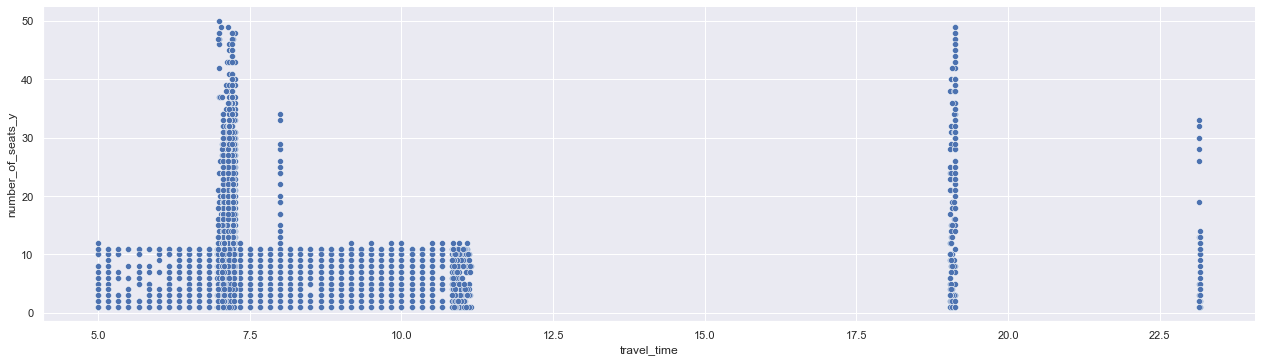

In [181]:
sns.relplot(data = train_eda, y = 'number_of_seats_y', x = 'travel_time', kind = 'scatter', aspect = 3.5)
plt.title("Number of Seats by Length of Travel (hours)", size = 20);
#Maybe good to make time into categorical ranges and do a boxplot 

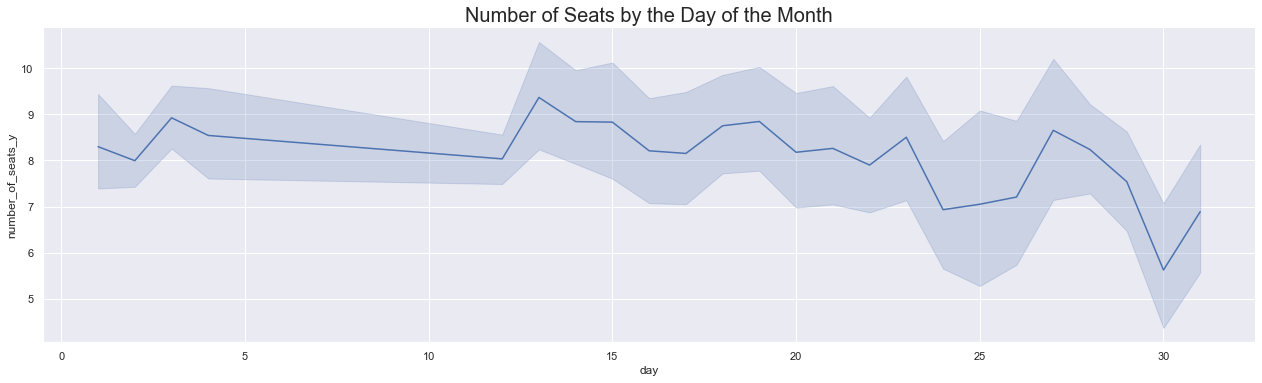

In [194]:
sns.relplot(data = train_eda, y = 'number_of_seats_y', x = 'day', kind = 'line', aspect = 3.5)
plt.title("Number of Seats by the Day of the Month", size = 20);

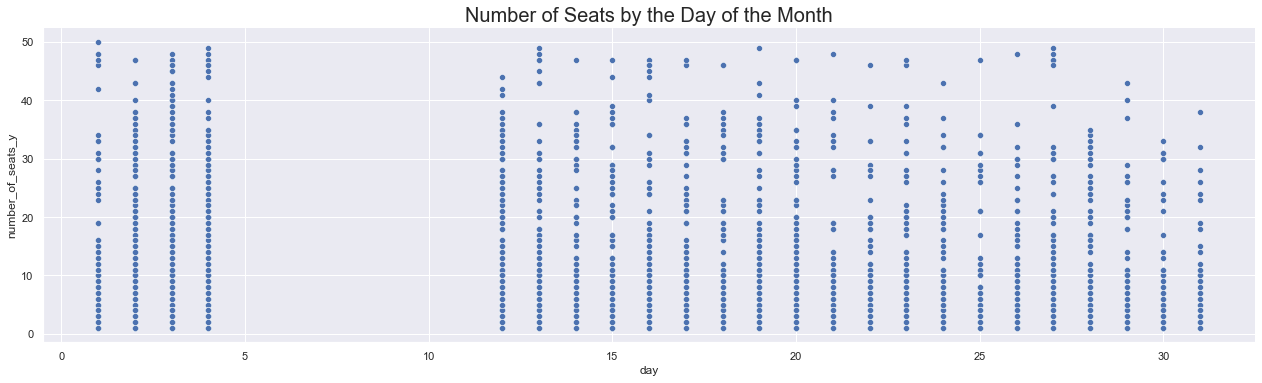

In [198]:
sns.relplot(data = train_eda, y = 'number_of_seats_y', x = 'day', kind = 'scatter', aspect = 3.5)
plt.title("Number of Seats by the Day of the Month", size = 20);
#Interesting that there's no data for days 4 to 12

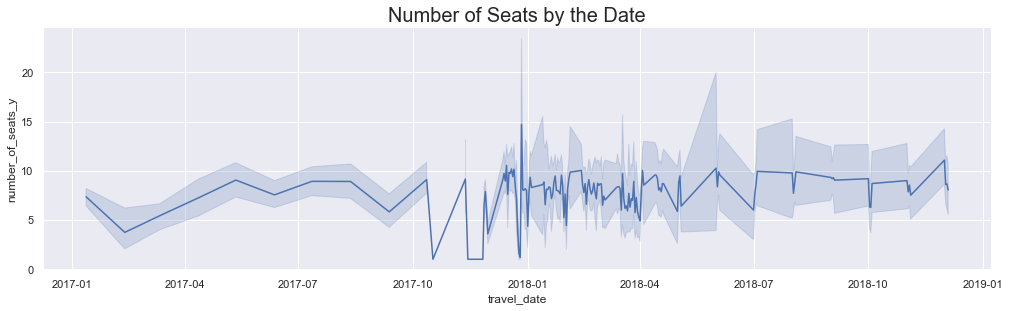

In [197]:
sns.relplot(data = train_eda, y = 'number_of_seats_y', x = 'travel_date', kind = 'line', height=4, aspect=3.5)
plt.title("Number of Seats by the Date", size = 20);

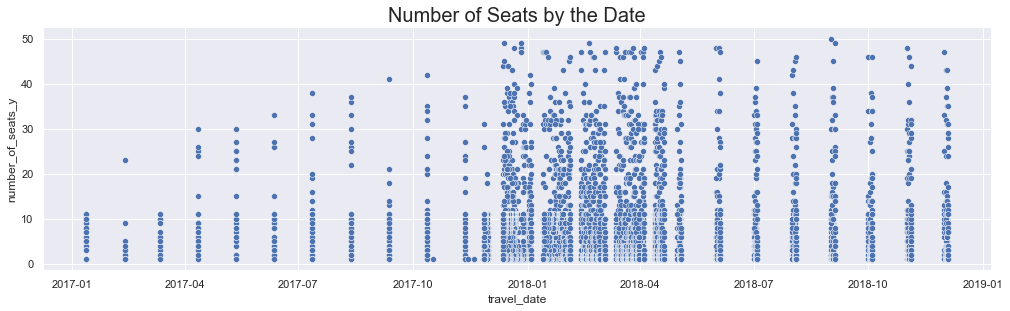

In [196]:
sns.relplot(data = train_eda, y = 'number_of_seats_y', x = 'travel_date', kind = 'scatter', height=4, aspect=3.5)
plt.title("Number of Seats by the Date", size = 20);

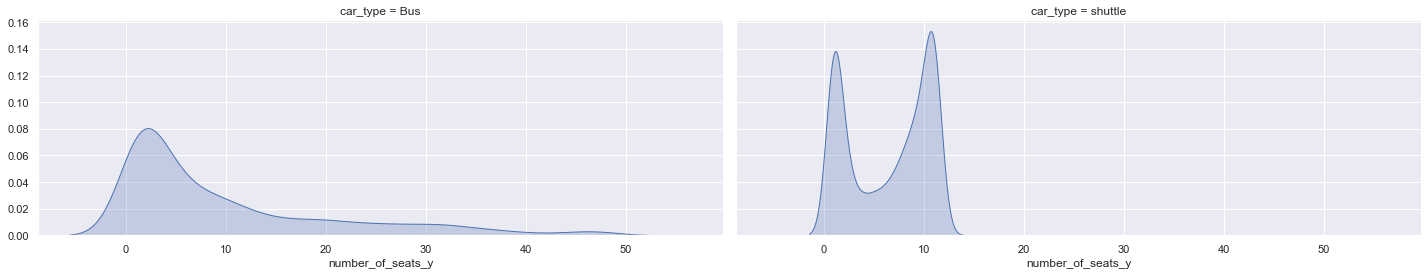

In [193]:
fg = sns.FacetGrid(data = train_eda, col = 'car_type', size=4, aspect=2.5,)
fg.map(sns.kdeplot, "number_of_seats_y", shade=True);

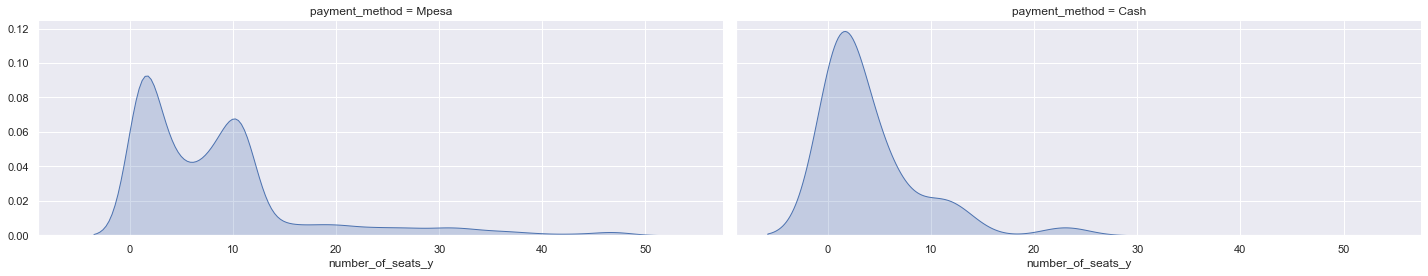

In [192]:
fg = sns.FacetGrid(data = train_eda, col = 'payment_method', size=4, aspect=2.5,)
fg.map(sns.kdeplot, "number_of_seats_y", shade=True);

In [144]:
train_eda.groupby('travel_from')[['number_of_seats_y']].agg(['min', 'mean', 'median', 'max'])

number_of_seats_y                        
                          min       mean median   max
travel_from                                          
Awendo                    1.0   9.664865    6.0  36.0
Homa Bay                  1.0  17.707865   18.5  46.0
Kehancha                  1.0  11.098837   11.0  30.0
Kendu Bay                 1.0   1.000000    1.0   1.0
Keroka                    1.0   3.166667    1.0  12.0
Keumbu                    1.0   1.100000    1.0   2.0
Kijauri                   1.0   1.854317    1.0  11.0
Kisii                     1.0   7.485762    8.0  49.0
Mbita                     2.0  18.000000   13.0  37.0
Migori                    1.0  18.204663   17.0  49.0
Ndhiwa                    1.0  10.727273   11.0  13.0
Nyachenge                 1.0   2.612245    2.0  11.0
Oyugis                    1.0   2.500000    2.5   4.0
Rodi                      1.0   7.941176    8.0  14.0
Rongo                     1.0   5.322493    3.0  37.0
Sirare                    1.0  23.293194   21.0  50.0
Sori                      1.0   2.750000    2.0  10.0

# Transforming Data (ML)

Trying to separate target and feature columns before transforming

In [206]:
train_ml = train_eda.drop('travel_date', axis = 1).drop('year', axis = 1).drop('travel_to', axis = 1)
train_ml.head()

,payment_method,travel_time,travel_from,car_type,max_capacity,number_of_seats_y,month,day
ride_id,,,,,,,,
1442,Mpesa,7.250000,Migori,Bus,49,1.0,10,17
5437,Mpesa,7.200000,Migori,Bus,49,1.0,11,19
5710,Mpesa,7.083333,Keroka,Bus,49,1.0,11,26
5777,Mpesa,7.166667,Homa Bay,Bus,49,5.0,11,27
5778,Mpesa,7.200000,Migori,Bus,49,31.0,11,27


In [230]:
#train_ml = pd.get_dummies(train_ml,prefix=['travel_from'], columns = ['travel_from'], drop_first=True)
train_ml = pd.get_dummies(train_ml,prefix=['car_type'], columns = ['car_type'], drop_first=True)
train_ml = pd.get_dummies(train_ml,prefix=['payment_method'], columns = ['payment_method'], drop_first=True)

In [231]:
train_ml.head() #no NAs!!

,travel_time,max_capacity,number_of_seats_y,month,day,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,travel_from_Keumbu,...,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,car_type_shuttle,payment_method_Mpesa
ride_id,,,,,,,,,,,,,,,,,,,,,
1442,7.250000,49,1.0,10,17,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5437,7.200000,49,1.0,11,19,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5710,7.083333,49,1.0,11,26,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5777,7.166667,49,5.0,11,27,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5778,7.200000,49,31.0,11,27,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


# Training Data (All Relevant Variables)

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [236]:
target = "number_of_seats_y"
feature_cols = train_ml.drop("number_of_seats_y", axis = 1).columns

In [242]:
feature_cols

Index(['travel_time', 'max_capacity', 'month', 'day', 'travel_from_Homa Bay',
       'travel_from_Kehancha', 'travel_from_Kendu Bay', 'travel_from_Keroka',
       'travel_from_Keumbu', 'travel_from_Kijauri', 'travel_from_Kisii',
       'travel_from_Mbita', 'travel_from_Migori', 'travel_from_Ndhiwa',
       'travel_from_Nyachenge', 'travel_from_Oyugis', 'travel_from_Rodi',
       'travel_from_Rongo', 'travel_from_Sirare', 'travel_from_Sori',
       'car_type_shuttle', 'payment_method_Mpesa'],
      dtype='object')

In [238]:
X = train_ml[feature_cols]
y = train_ml[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [240]:
model = LinearRegression()
model.fit(X = X_train, y = y_train)

LinearRegression()

In [241]:
predictions = model.predict(X_test)
for y, y_pred in list(zip(y_test, predictions))[:5]:
    print("Real value: {:.3f} Estimated value: {:.5f}".format(y, y_pred))

Real value: 3.000 Estimated value: 5.37666
Real value: 3.000 Estimated value: 7.73540
Real value: 4.000 Estimated value: 7.36967
Real value: 2.000 Estimated value: 18.66961
Real value: 8.000 Estimated value: 5.48742


In [243]:
X = X_test.reset_index().copy() # make a copy of indices and data
X["target"] = y_test.tolist()
X["prediction"] = predictions
X.head()

,ride_id,travel_time,max_capacity,month,day,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,travel_from_Keumbu,...,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,car_type_shuttle,payment_method_Mpesa,target,prediction
0,11819,7.050000,49,7,3,0,0,0,0,0,...,0,0,0,1,0,0,0,1,3.0,5.376657
1,12324,9.833333,11,1,12,0,0,0,0,0,...,0,0,0,0,0,0,1,1,3.0,7.735403
2,20114,7.166667,49,12,12,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4.0,7.369666
3,11714,7.133333,49,6,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2.0,18.669611
4,13556,7.066667,49,4,15,0,0,0,0,0,...,0,0,1,0,0,0,0,1,8.0,5.487420


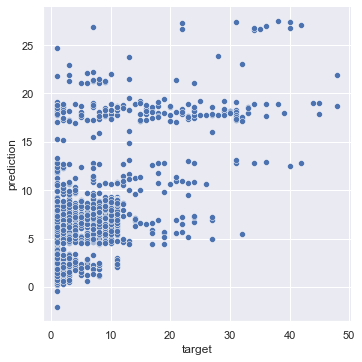

In [245]:
sns.relplot(x="target", y="prediction", data=X, kind="scatter");